# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Cleanin the data

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [3]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [8]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [9]:
df_flights = df_flights.dropna(axis=0, how='any')

In [10]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

DepDelay 
Minimum:-63.00
Mean:10.46
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay 
Minimum:-75.00
Mean:6.56
Median:-3.00
Mode:-7.00
Maximum:1440.00



C:\Users\skele\AppData\Local\Temp/ipykernel_3996/434812748.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\skele\AppData\Local\Temp/ipykernel_3996/434812748.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


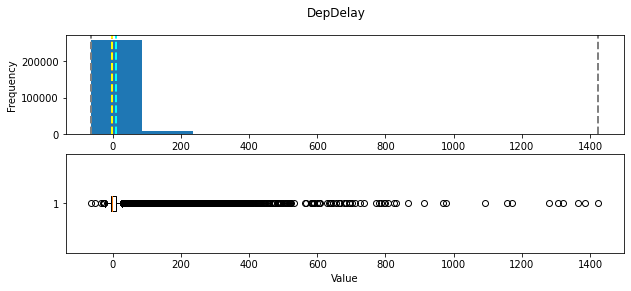

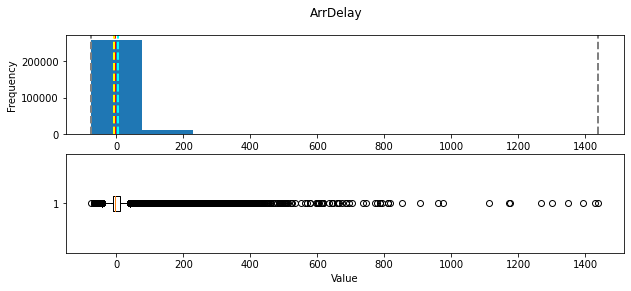

In [21]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(var_data.name)

    # Show the figure
    fig.show()

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
for col in delayFields:
    show_distribution(df_flights[col])

DepDelay 
Minimum:-11.00
Mean:-0.93
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay 
Minimum:-32.00
Mean:-5.10
Median:-6.00
Mode:-7.00
Maximum:37.00



C:\Users\skele\AppData\Local\Temp/ipykernel_3996/434812748.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\skele\AppData\Local\Temp/ipykernel_3996/434812748.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


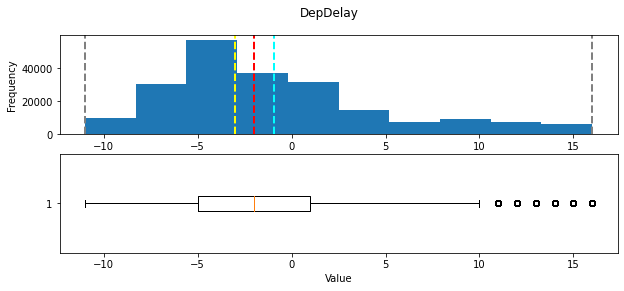

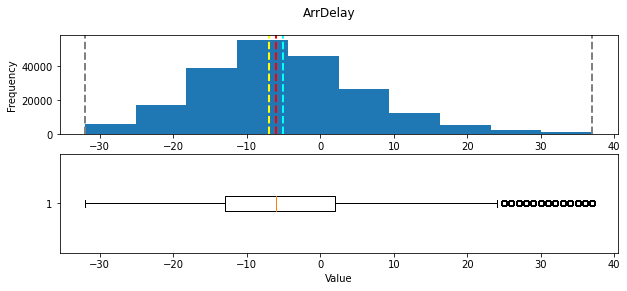

In [22]:
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col])

## Explore the data

In [24]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,211636.0,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000,211636.000000
mean,2013.0,7.025709,15.797601,3.906623,12757.828503,12726.502150,1276.226134,-0.933716,0.018352,1459.762640,-5.095901,0.056451,0.000354
std,0.0,2.008376,8.868659,2.000502,1511.121853,1507.491007,469.265616,5.744733,0.134222,485.467246,11.484008,0.230791,0.018822
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1053.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1230.000000,-2.000000,0.000000,1442.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,24.000000,6.000000,14100.000000,14057.000000,1650.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


In [25]:
df_flights[delayFields].mean()

DepDelay   -0.933716
ArrDelay   -5.095901
dtype: float64

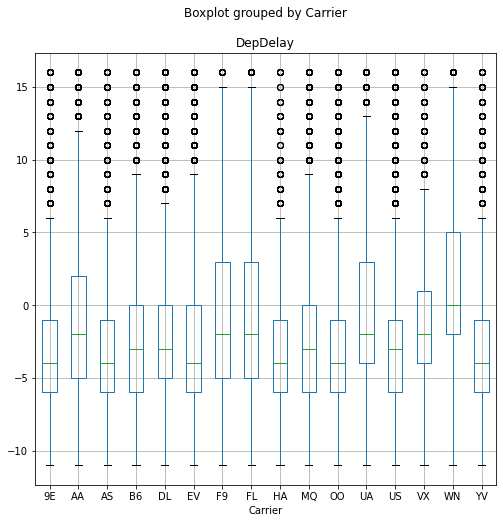

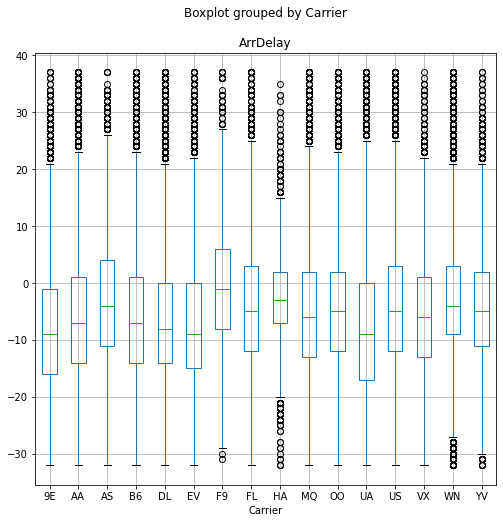

In [26]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

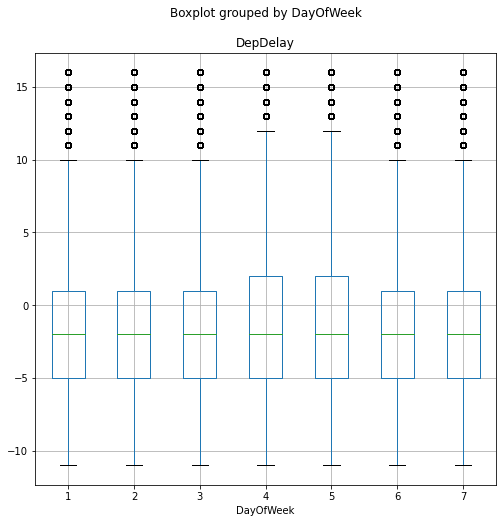

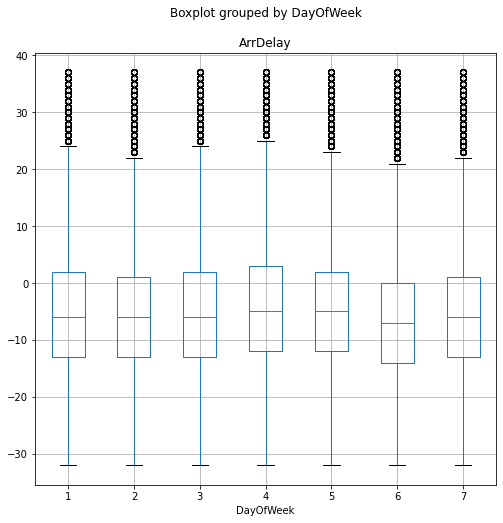

In [27]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

### Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.382568
Dallas Love Field,2.164267
William P Hobby,1.582985
Metropolitan Oakland International,0.982835
Denver International,0.813458
...,...
Tucson International,-3.005453
Memphis International,-3.024205
Ted Stevens Anchorage International,-3.165049


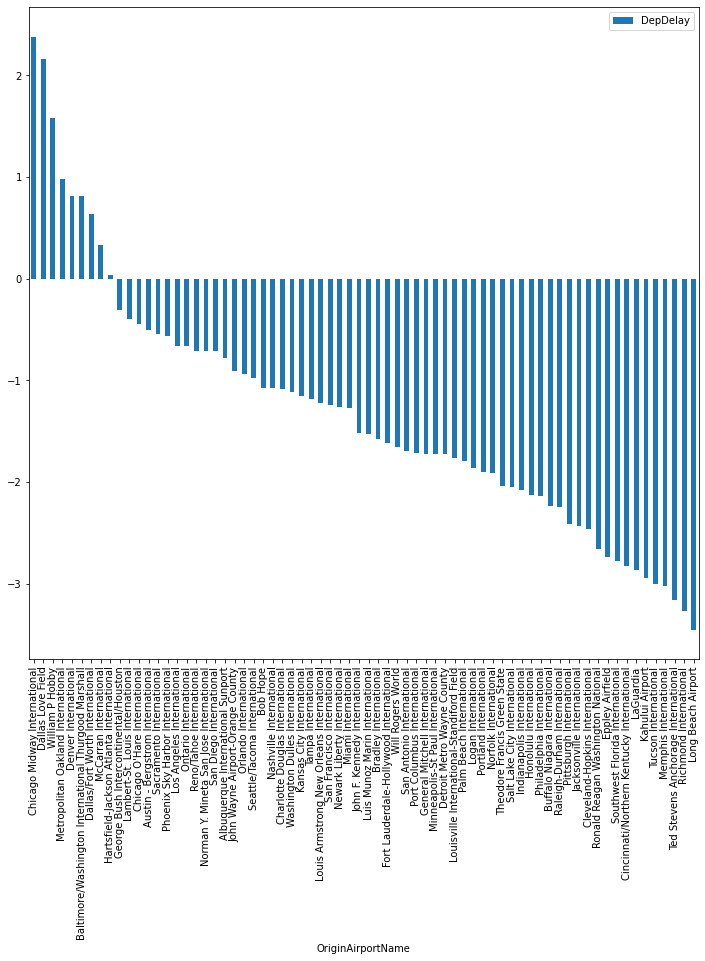

In [28]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

Do late departures tend to result in longer arrival delays than on-time departures?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

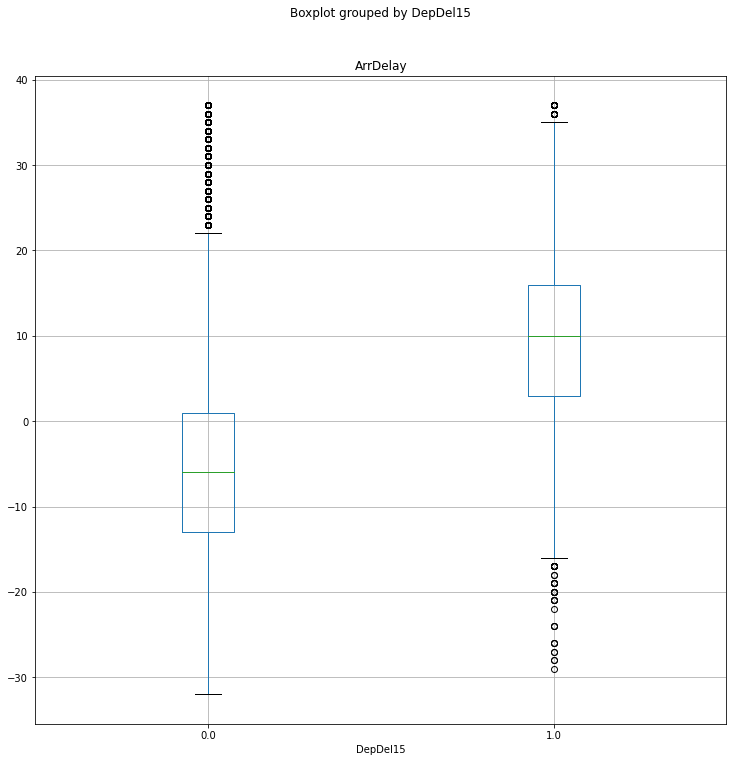

In [29]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

Which route (from origin airport to destination airport) has the most late arrivals?


In [30]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
LaGuardia > Hartsfield-Jackson Atlanta International,54
Los Angeles International > John F. Kennedy International,50
San Francisco International > Los Angeles International,46
John F. Kennedy International > Los Angeles International,40
John F. Kennedy International > San Francisco International,39
...,...
Salt Lake City International > Louis Armstrong New Orleans International,0
Lambert-St. Louis International > John F. Kennedy International,0
Lambert-St. Louis International > Kansas City International,0


Which route has the highest average arrival delay?

In [31]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667
